## PCA (Principal component analysis)
### What is PCA?
PCA is commonly known as a dimensionality reduction algorithm, but it can also be used to visualize data (as high dimensions of data can be hard to visualize)

### Great, what are the steps to do PCA?
1. Standardize the range of continuous initial variables
2. Compute the covariance matrix to identify correlations
3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
4. Create a feature vector to decide which principal components to keep, basically keeping k eigenvalues
5. Recast the data along the principal components axes

### What are eigenvalues and eigenvectors?
Eigenvalues is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it. The corresponding eigenvalue is the factor by which the eigenvector is scaled.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


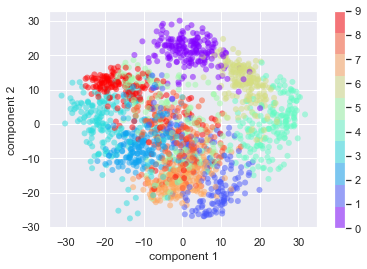

In [16]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [17]:
print(pca.components_)

[[ 9.71445147e-17 -1.73094659e-02 -2.23428839e-01 -1.35913314e-01
  -3.30323231e-02 -9.66340737e-02 -8.32942483e-03  2.26900260e-03
  -3.20516578e-04 -1.19308910e-01 -2.44451673e-01  1.48512746e-01
  -4.67319535e-02 -2.17740749e-01 -1.48136676e-02  4.47779570e-03
  -4.94136784e-05 -7.95419426e-02  8.33951612e-02  2.15915346e-01
  -1.72126790e-01 -1.63712109e-01  2.86444398e-02  4.23251744e-03
   9.85488441e-05  6.42319115e-02  2.54093311e-01 -3.56771103e-02
  -2.09462549e-01 -4.31311546e-02  5.13118527e-02  2.13422706e-04
  -0.00000000e+00  1.59950885e-01  3.68690756e-01  1.64406804e-01
   8.52007979e-02  3.72982989e-02  2.15866943e-02 -0.00000000e+00
   1.28865596e-03  1.06945298e-01  3.03067472e-01  2.47813047e-01
   2.09637292e-01  1.22325345e-02 -3.69458499e-02  1.61485003e-03
   6.93023637e-04 -8.35143685e-03 -5.58598815e-02  9.30534187e-02
   1.07387709e-01 -1.37734573e-01 -6.32879510e-02  9.61669175e-04
   9.55080480e-06 -1.40786839e-02 -2.35675490e-01 -1.41225596e-01
  -9.15965

In [18]:
print(pca.explained_variance_)


[179.0069301  163.71774688]


In [21]:
# def draw_vector(v0, v1, ax=None):
#     ax = ax or plt.gca()
#     arrowprops=dict(arrowstyle='->',
#                     linewidth=2,
#                     shrinkA=0, shrinkB=0)
#     ax.annotate('', v1, v0, arrowprops=arrowprops)

# # plot data
# plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
# for length, vector in zip(pca.explained_variance_, pca.components_):
#     v = vector * 3 * np.sqrt(length)
#     draw_vector(pca.mean_, pca.mean_ + v)
# plt.axis('equal');

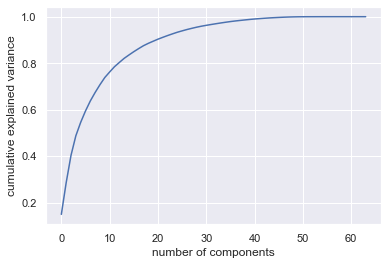

In [22]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

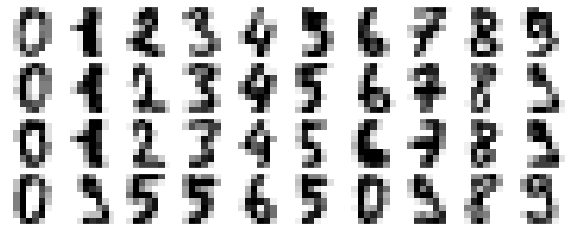

In [23]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

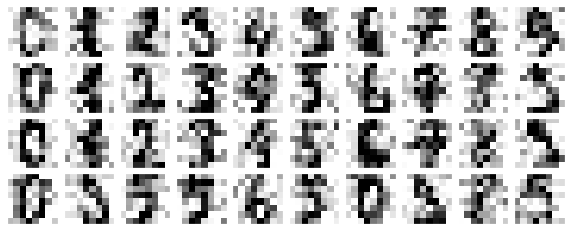

In [24]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [25]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

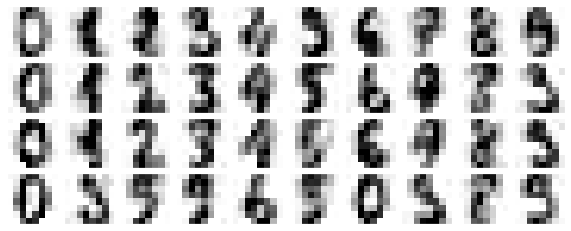

In [26]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)